In [1]:
from main import *

Datei öffnen:

In [2]:
audio_arr, sr = openFile(r"..\viblib\v-09-10-12-2.wav")

File ..\viblib\v-09-10-12-2.wav exists.


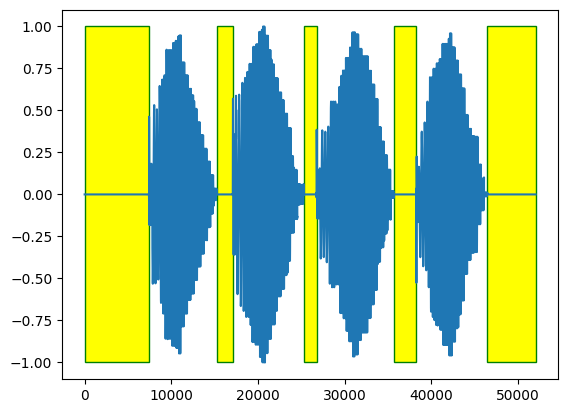

In [3]:
breaks_list = findBreaks(audio_arr=audio_arr, sr=sr) #findet Pausen in Audio Array

# Amplituden berechnen

Die eigentlichen Amplituden werden mittels getAmplitudes() gefunden

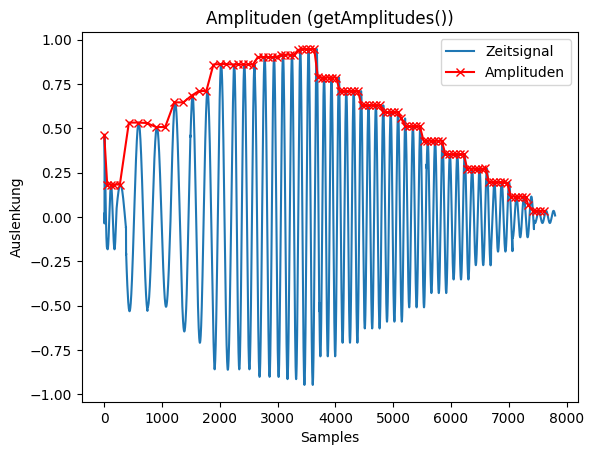

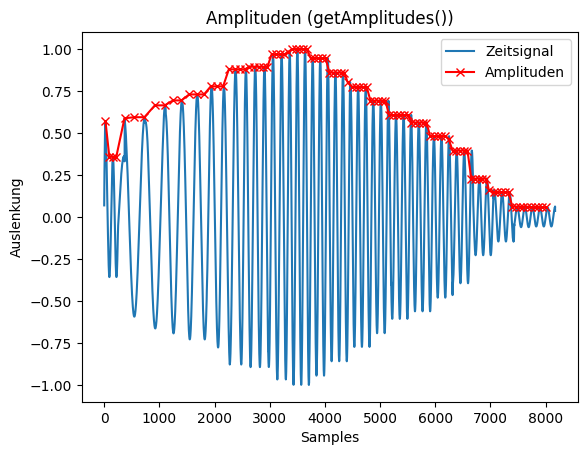

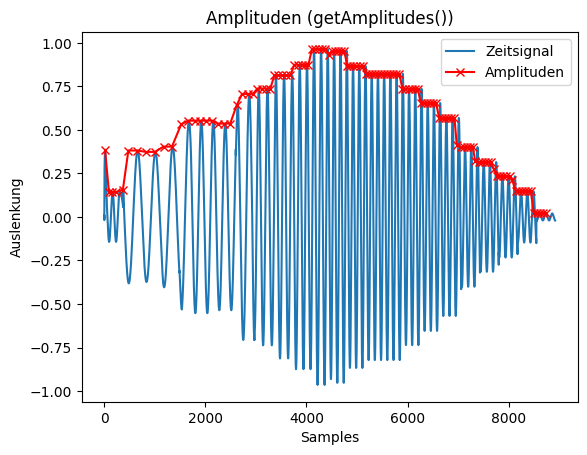

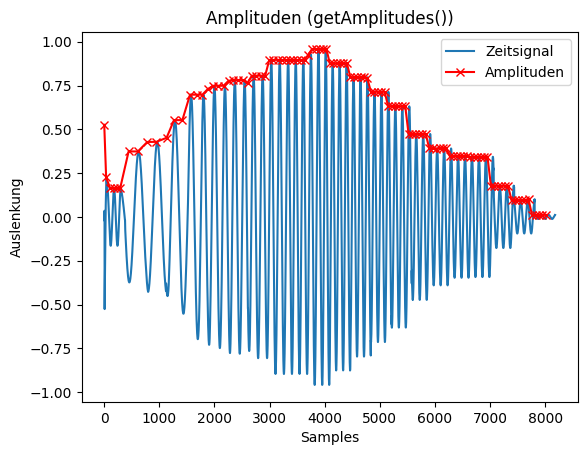

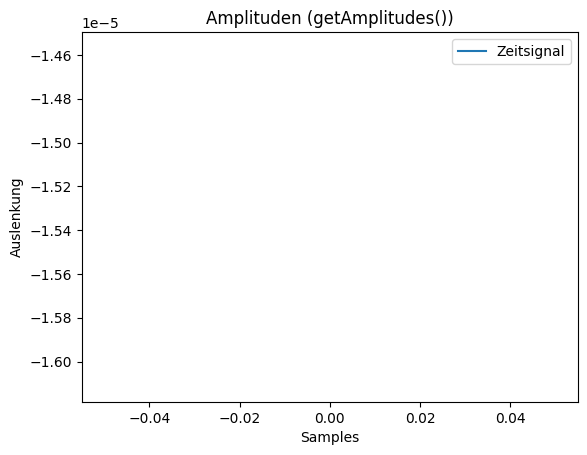

In [4]:
audio_arr_list = splitAudioArrAtBreaks(audio_arr=audio_arr, breaksList=breaks_list)
amplitudes = []
for audio in audio_arr_list:
  amplitudes.append(getAmplitudes(audio,sr=sr))

Die Amplituden werden interpoliert (interpolate()), so dass eine kontinuierlicher Graph entsteht, aus dem das RMS gebildet werden kann.

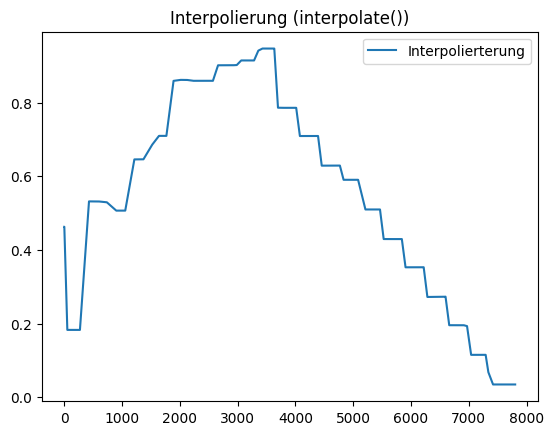

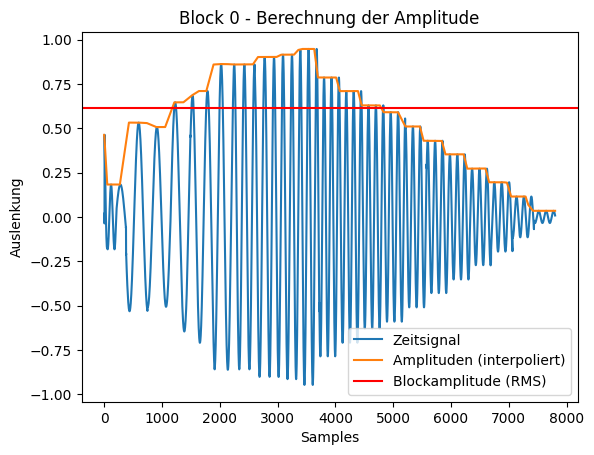

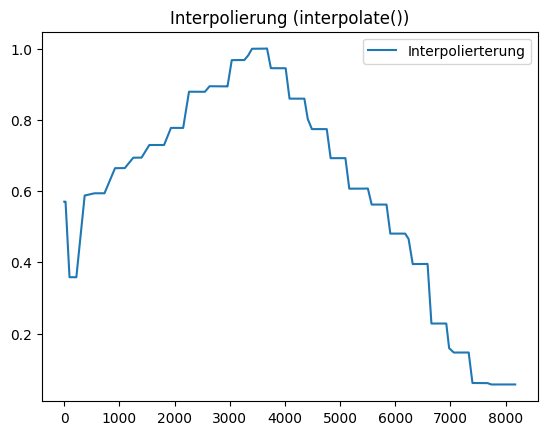

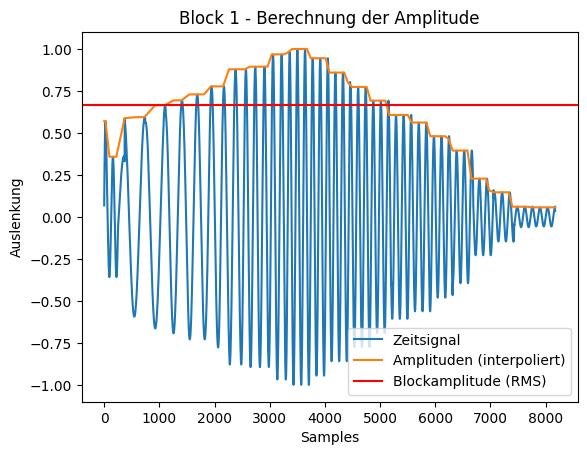

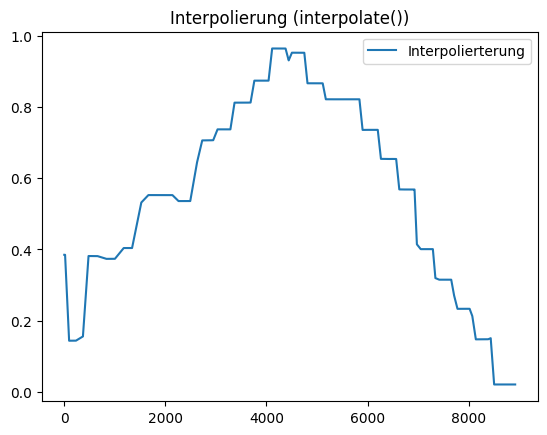

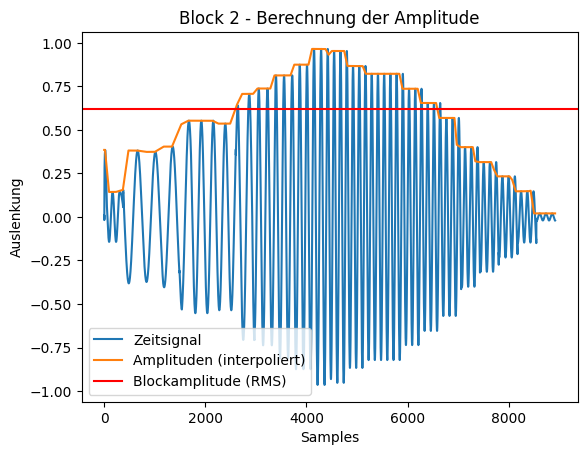

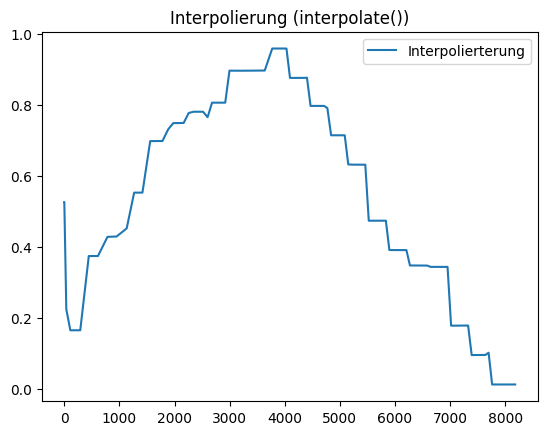

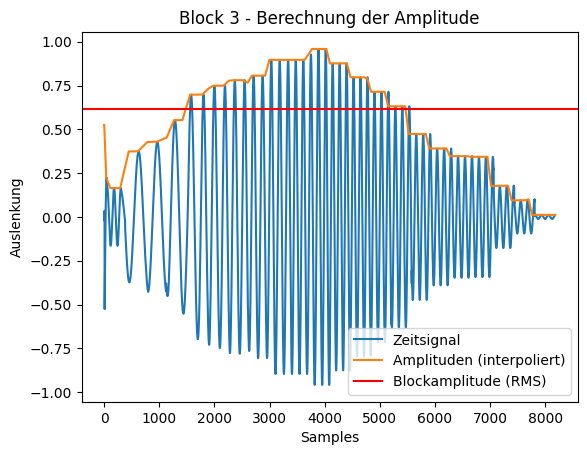

In [5]:
for i in range(0,len(amplitudes)):
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:
        interpolated = interpolate(amplitudes[i], len(audio_arr_list[i]))
        arms = rms(interpolated)
        plt.figure(1000 + i)
        plt.plot(audio_arr_list[i], label="Zeitsignal")
        plt.plot(interpolated, label="Amplituden (interpoliert)")
        plt.axhline(arms, color="red", label = "Blockamplitude (RMS)")
        plt.xlabel("Samples")
        plt.ylabel("Auslenkung")
        plt.title("Block " + str(i) + " - Berechnung der Amplitude")
        plt.legend()


# Frequenzerkennung

c:\Users\Domin\anaconda3\envs\WtT\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


tensorflow: 2.16.1



tensorflow: 2.16.1
Frequenz:  112.58148
Frequenz:  112.1251
Frequenz:  113.27126
Frequenz:  113.58998


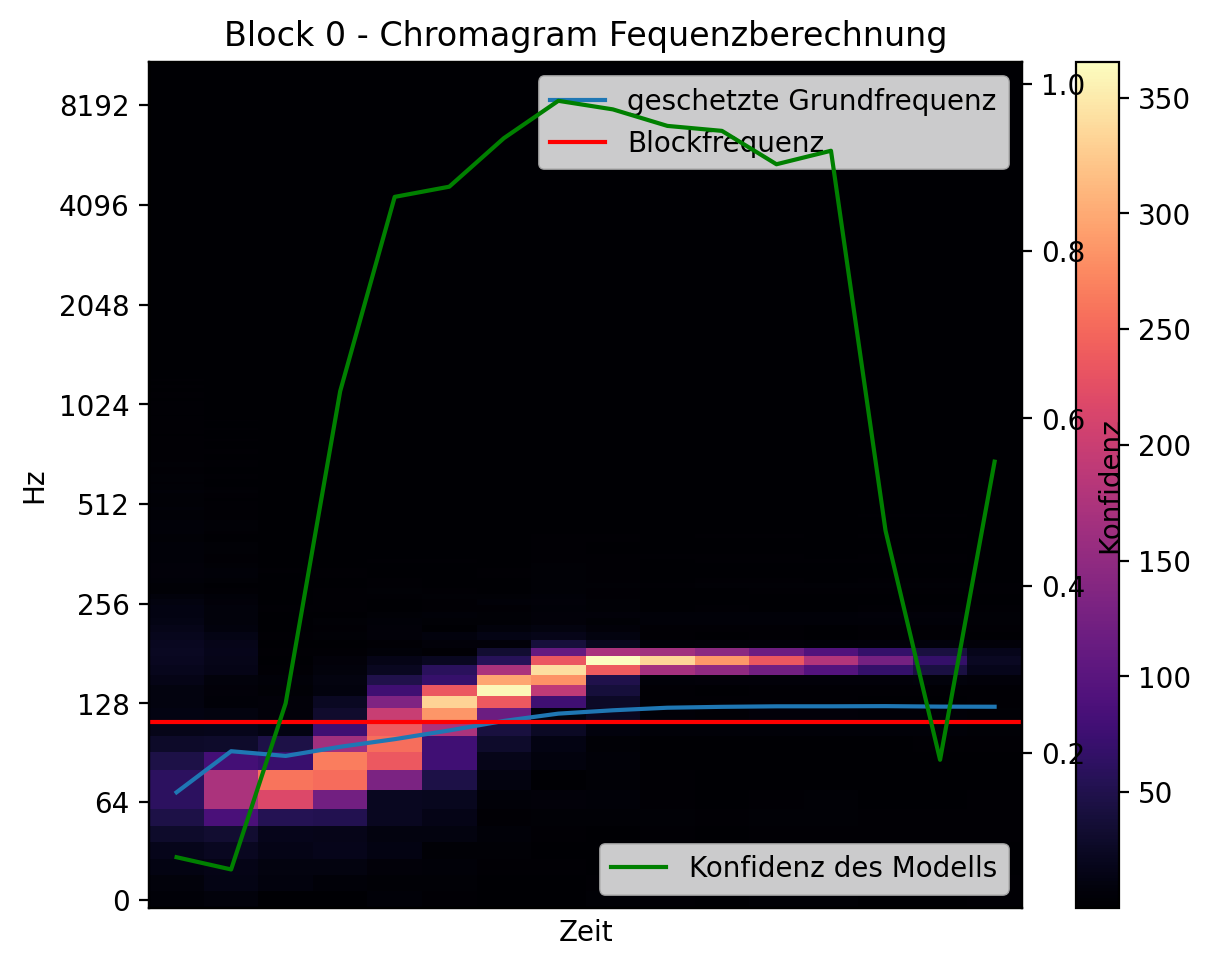

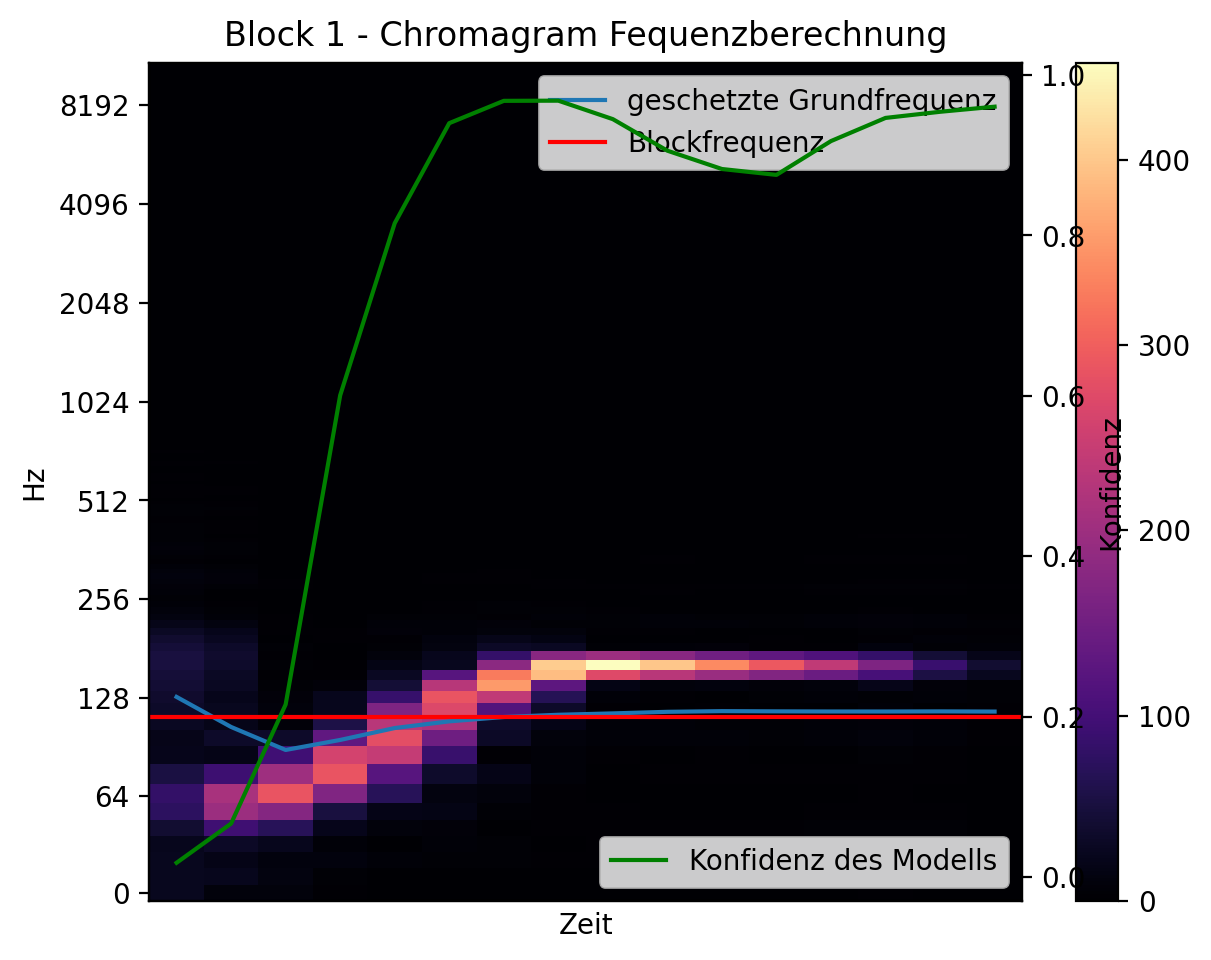

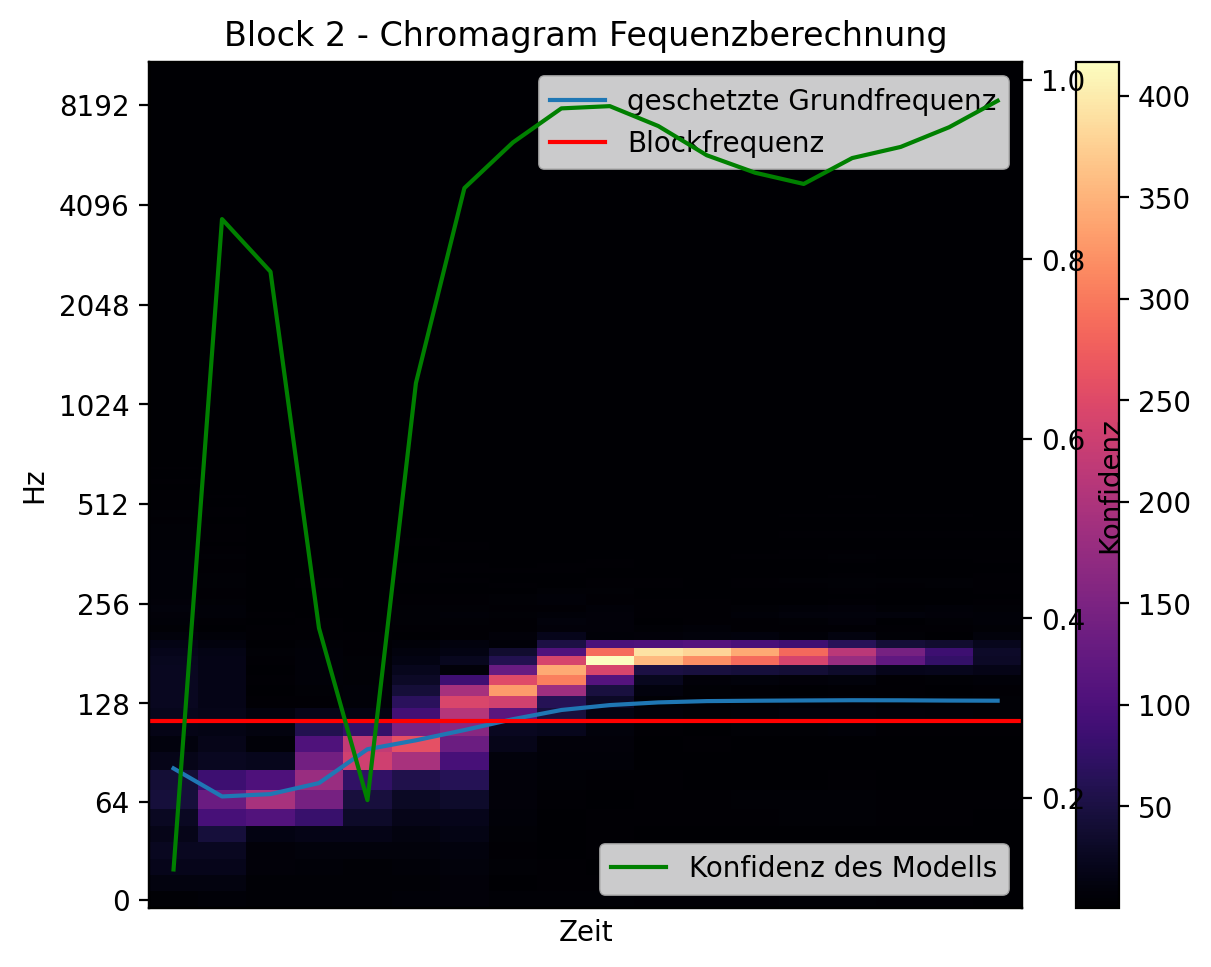

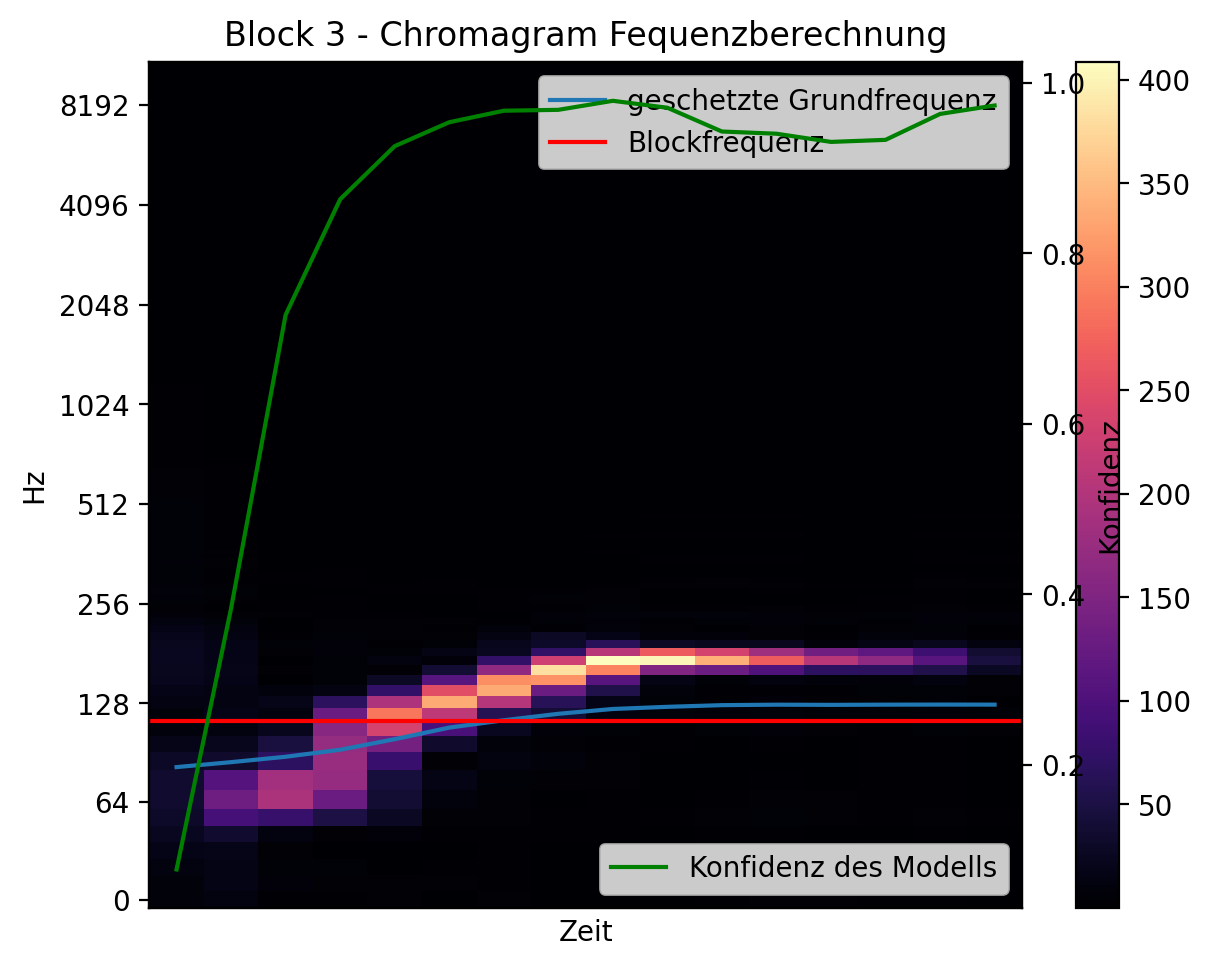

In [6]:
from aiBasefrequency import *
import librosa

i = 0
for audio in audio_arr_list:
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:
        plt.figure(2000 + i)
        plt.title("Block " + str(i) + " - Chromagram Fequenzberechnung")

        frequency,uncertainty = getFrequencies(audio,sr=sr)
        confidence = 1 - uncertainty

        frequency = outputTooHz(frequency)
       
        plt.plot(frequency, label="geschetzte Grundfrequenz")
        frequency = rms(frequency)
        print("Frequenz: ", frequency)

        S = numpy.abs(librosa.stft(audio))

        img = librosa.display.specshow(S, y_axis='log')
        plt.colorbar()
        plt.tight_layout()
        plt.axhline(frequency, color="red", label = "Blockfrequenz")
        plt.legend()
        plt.xlabel("Zeit")
        plt.twinx()
        plt.plot(confidence, color="green", label="Konfidenz des Modells")
        plt.ylabel("Konfidenz")
        plt.legend()
   
        i += 1

    